## Initialisation

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from utils import train_test
from data_utils import Load_mu_sigma
import os
import numpy as np

# PARAMETERS :
seed = '0' # file used
nvalues=0 # terms in autoregression
#X = Load_mu_sigma("Data/150x50000xSeed1_ns_dt3")

### Make the datasets

In [2]:
X = Load_mu_sigma("Data/150x50000x1xSeed0/")
muX = np.mean(X, axis=0).reshape(1,-1)
sigmaX = np.std(X, axis=0).reshape(1,-1)
X = (X-muX)/sigmaX

Y = X[:-1]
X = X[1:]

nvalues=0

Average mean of data 0.7451057015981052
Average error train 0.0024559075801177336
Average error test 0.0023137029368006743


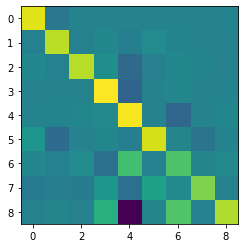

In [3]:
from sklearn.linear_model import Ridge
Xtrain, Ytrain, Xtest, Ytest = train_test(X,Y,0.1)
L = Ridge(alpha=0.01,fit_intercept=True)

L.fit(Xtrain,Ytrain)
plt.imshow(L.coef_)

print("Average mean of data", np.mean(abs(Xtest)))
#print("Deviations of each term", np.std(Xtest, axis=0)**2)
print("Average error train", mean_squared_error(L.predict(Xtrain),Ytrain))
print("Average error test", mean_squared_error(L.predict(Xtest),Ytest))

### NEW DATA

In [22]:
X2 = Load_mu_sigma("Data/150x50000x1xSeed10_ns/")
#X1 = Load_mu_sigma("Data/150x50000x3xSeed1/")
X2 = Load_mu_sigma("Data/150x50000x3xSeed11_ns/")

X2 = (X2-muX)/sigmaX
Y2 = X2[:-1]
X2 = X2[1:]
Y2=Y2[nvalues:]

In [23]:
print("Average mean of data", np.mean(abs(X2)))
#print("Deviations of each term", np.std(Xtest, axis=0)**2)
print("Average error train", mean_squared_error(L.predict(X2),Y2))
print("Average error test", mean_squared_error(L.predict(X2),Y2))

Average mean of data 0.7576143432631809
Average error train 0.06624761901044293
Average error test 0.06624761901044293


In [1]:
from data_utils import reparse_data
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

V = reparse_data("Data/150x50000x1xSeed10_ns.data")
V.shape
V=V.reshape(150,50000,3)

<Figure size 640x480 with 1 Axes>

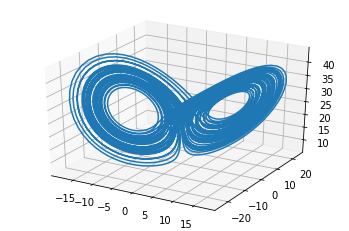

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
idx= np.arange(5000,10000)
#for i,s in enumerate(states):
ax.plot(V[0,idx,0], V[0,idx,1], V[0,idx,2])
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

V = reparse_data("Data/150x50000x1xSeed0.data")
V=V.reshape(150,50000,3)

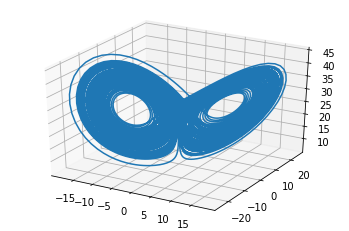

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
idx= np.arange(6000,20000)
ax.plot(V[0,idx,0], V[0,idx,1], V[0,idx,2])
plt.show()